# Taller Final - Minería de datos
Grupo "crimen"

*Integrantes*
- Juan Sebastián Gallego
- Nathalia Gamboa
- David Santiago Ovalle


## Necesidad identificada
Identificar qué dimensiones y variables pueden tener mayor incidencia en la varianza de los datos analizados y relación con la tasa de crimen violento en algunas comunidades de los Estados Unidos.

# Carga de datos, limpieza y reducción inicial de dimensiones

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##DATOS
#Comunidades de Estados Unidos.
Los datos combinan los datos socioeconómicos del censo de 1990 de EE.UU., los de aplicación de la ley de la encuesta LEMAS de EE.UU. de 1990 y los de delincuencia del UCR del FBI de 1995.

Las variables incluidas en el conjunto de datos tienen que ver con la comunidad, como el porcentaje de la población que se considera urbana, la renta familiar media, así como la raza de la poblacion y sus ingresos; igualmente con la aplicación de la ley, como el número per cápita de agentes de policía.

Así, se tiene la siguiente información:

Variables nominales
- **state**: Estado de EE.UU. (por número)
- **communityname**: nombre de la comunidad

Variable objetivo
- **crimes_perpop**: Crimenes por cada 100 habitantes

Variables poblacionales
- **population**: población por comunidad
- **household_size**: media de personas por hogar
- **racepct_black**: porcentaje de población afroamericana
- **racepct_white**: porcentaje de población caucásica
- **racepct_asian**: porcentaje de población de origen asiático
- **racepct_hisp**: porcentaje de población de origen hispano
- **pct_urban**: porcentaje de personas que viven en zonas clasificadas como urbanas

Variables económicas
-  **med_income**:  mediana de la renta de los hogares
- **med_fam_inc**: renta familiar mediana (difiere de la renta de los hogares no familiares)
- **percap_inc**: renta per cápita
- **white_percap**: renta per cápita de los caucásicos
- **black_percap**: renta per cápita de los afroamericanos
- **indian_percap**: renta per cápita de los nativos americanos
- **asian_percap**: renta per cápita de las personas de origen asiático
- **hisp_percap**: renta per cápita de las personas de origen hispano
-  **pctpop_underpov**: porcentaje de personas por debajo del nivel de pobreza
- **rent_median**: vivienda de alquiler - renta mediana

Otras variables
- **police_perpop**: agentes de policía por cada 100.000 habitantes
- **police_cars**: número de carros de policía



Nota: Las variables ya se encuentran normalizadas desde el origen.
La normalización preserva las relaciones aproximadas de los valores DENTRO de un atributo (por ejemplo, el doble del valor para el doble de la población dentro de la precisión disponible - excepto para los valores extremos (todos los valores más de 3 DS por encima de la media se normalizan a 1,00; todos los valores más de 3 DS por debajo de la media se normalizan a 0,00)).
Fuente: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime


Al leer los datos se identifica que los NAN son signos de interrogación.

Así mismo, al hacer un análisis previo del conjunto de datos, y ver que son 128 variables, se decide hacer una preselección según la necesidad identificada, para dejar las variables que en el preprocesamiento son mas "interesantes" y relevantes para el análisis, al igual que aquellas que tienen menor pérdidad de datos.

In [ ]:
# df = pd.read_table('communities.data', delim_whitespace=True, header=None)
df = pd.read_excel('/content/data.xlsx')
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column119,Column120,Column121,Column122,Column123,Column124,Column125,Column126,Column127,Column128
0,8,?,?,Lakewoodcity,1,19,33,2,9,12,...,12,26,2,0.06,0.04,0.9,0.5,32,0.14,2
1,53,?,?,Tukwilacity,1,0,16,12,74,45,...,2,12,45,?,?,?,?,0,?,67
2,24,?,?,Aberdeentown,1,0,42,49,56,17,...,1,21,2,?,?,?,?,0,?,43
3,34,5,81440,Willingborotownship,1,4,77,1,8,12,...,2,39,28,?,?,?,?,0,?,12
4,42,95,6096,Bethlehemtownship,1,1,55,2,95,9,...,4,9,2,?,?,?,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,1,4,1,87,12,...,1,28,5,?,?,?,?,0,?,9
1990,6,?,?,Seasidecity,10,5,96,46,28,83,...,2,37,2,?,?,?,?,0,?,45
1991,9,9,80070,Waterburytown,10,16,37,25,69,4,...,8,32,18,0.08,0.06,0.78,0,91,0.28,23
1992,25,17,72600,Walthamcity,10,8,51,6,87,22,...,3,38,33,0.02,0.02,0.79,0,22,0.18,19


Se seleccionan 18 variables clave, descritas en el diccionario de datos.

In [ ]:
# Seleccion de variables clave
df_1 = df[["Column1", "Column4", "Column6", "Column7", "Column8", "Column9", "Column10", "Column11", "Column17", "Column18", "Column25", "Column26", 
           "Column27", "Column28", "Column29", "Column30", "Column32", "Column34", "Column89", "Column109", "Column122", "Column128"]]
df_1.columns = ["state", "community_name", "population", "household_size", "racepct_black", "racepct_white", "racepct_asian", "racepct_hisp", "pct_urban", 
                "med_income", "med_fam_inc", "percap_inc", "white_percap", "black_percap", "indian_percap", "asian_percap", "hisp_percap", 
                "pctpop_underpov", "rent_median", "police_perpop", "police_cars", "crimes_perpop"]
df_1

,state,community_name,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,...,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median,police_perpop,police_cars,crimes_perpop
0,8,Lakewoodcity,19,33,2,9,12,17,1,37,...,39,32,27,27,41,19,35,0.13,0.06,2
1,53,Tukwilacity,0,16,12,74,45,7,1,31,...,38,33,16,3,35,24,38,?,?,67
2,24,Aberdeentown,0,42,49,56,17,4,0,3,...,29,27,7,29,39,27,29,?,?,43
3,34,Willingborotownship,4,77,1,8,12,1,1,58,...,4,39,16,25,44,1,7,?,?,12
4,42,Bethlehemtownship,1,55,2,95,9,5,9,5,...,41,28,0,74,48,6,36,?,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,1,4,1,87,12,16,1,42,...,5,27,0,16,52,16,39,?,?,9
1990,6,Seasidecity,5,96,46,28,83,32,1,28,...,2,26,18,2,26,32,54,?,?,45
1991,9,Waterburytown,16,37,25,69,4,25,1,31,...,34,25,19,28,28,31,34,0.3,0.08,23
1992,25,Walthamcity,8,51,6,87,22,1,1,44,...,4,29,2,31,37,16,62,0.25,0.02,19


Se hace la limpieza de datos

In [ ]:
# Detectamos cantidad de NA's
df_2 = df_1.replace(["?"], [np.nan])
df_2.isna().sum()

# Debido a que police_perpop y police_cars tienen más del 50% en NA's, se eliminan esas dos variables.
df_crime = df_2.drop(["police_perpop", "police_cars"], axis=1)
df_crime

# Se convierte state en variable nominal
df_crime["state"] = df_crime["state"].astype("str")
df_crime.dtypes

df_crime

,state,community_name,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,med_fam_inc,percap_inc,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median,crimes_perpop
0,8,Lakewoodcity,19,33,2,9,12,17,1,37,39,4,39,32,27,27,41,19,35,2
1,53,Tukwilacity,0,16,12,74,45,7,1,31,29,37,38,33,16,3,35,24,38,67
2,24,Aberdeentown,0,42,49,56,17,4,0,3,28,27,29,27,7,29,39,27,29,43
3,34,Willingborotownship,4,77,1,8,12,1,1,58,51,36,4,39,16,25,44,1,7,12
4,42,Bethlehemtownship,1,55,2,95,9,5,9,5,46,43,41,28,0,74,48,6,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,1,4,1,87,12,16,1,42,41,49,5,27,0,16,52,16,39,9
1990,6,Seasidecity,5,96,46,28,83,32,1,28,24,18,2,26,18,2,26,32,54,45
1991,9,Waterburytown,16,37,25,69,4,25,1,31,35,31,34,25,19,28,28,31,34,23
1992,25,Walthamcity,8,51,6,87,22,1,1,44,47,4,4,29,2,31,37,16,62,19


Para el analisis de aquí en adelante, se deciden eliminar las variables que involucran información sobre la policia, dado que solo están disponibles el 15.99% del total de los datos, cosa que no sucede con las demás variables.

# Análisis exploratorio (entendiendo los datos)

Todos los datos numéricos se encuentran normalizados en el rango de 0 a 100


In [ ]:
df_crime.describe()

,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,med_fam_inc,percap_inc,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median,crimes_perpop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000,1994.000000
mean,4.671515,41.126379,14.004514,70.005015,11.874624,10.601805,9.867603,31.504012,33.361083,30.222668,31.849047,25.869107,17.592778,28.196088,33.852558,26.271815,32.44333,19.550652
std,9.470790,18.664145,20.796399,30.128841,15.636562,17.222720,26.494687,20.932722,20.563121,18.884989,19.234491,16.885953,14.475672,18.723171,18.962856,21.976139,21.48856,20.239997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,33.000000,1.000000,54.250000,3.000000,1.000000,0.000000,16.000000,19.000000,18.000000,21.000000,15.000000,8.000000,16.000000,22.000000,8.000000,16.00000,5.000000
50%,2.000000,42.000000,4.000000,83.000000,6.000000,3.000000,1.000000,27.000000,29.000000,27.000000,29.000000,23.000000,16.000000,26.000000,33.000000,19.000000,28.00000,12.000000
75%,5.000000,52.000000,16.000000,94.000000,14.000000,11.000000,1.000000,45.000000,46.000000,41.000000,42.000000,35.000000,24.000000,38.000000,45.000000,42.000000,47.75000,27.750000
max,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000,99.000000,98.000000,98.000000,99.000000,95.000000,88.000000,99.000000,99.000000,99.000000,99.00000,97.000000


Se grafíca el boxplot para todas las variables

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
for index, column in df_crime.iloc[:, 2:].iteritems():
    fig.add_trace(go.Box(y=column, name=index))

fig.show()

In [ ]:
#Se grafíca el boxplot solo para la variable objetivo

fig = go.Figure()
for index, column in df_crime[['crimes_perpop']].iteritems():
    fig.add_trace(go.Box(y=column, name=index))

fig.show()

Las tasas de crimenes por cada 100.000 habitantes, en las comunidades tienen un mínimo de 0 crímenes, una media de 19.55, la mediana de 12 y un máximo de 97.
Sin embargo, el 50% de los datos de esta variable se encuentran entre 5 y 28.

La diferencia entre la mediana y la media es un indicador de outliers.

Revisar la correlación entre las variables numéricas

In [ ]:
# Tipos de correlaciones
corr = df_crime.corr()

#import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=corr.values,
                         x=corr.columns.values,
                         y=corr.columns.values))
fig.show()

# ANÁLISIS DE CORRELACIONES 
Al analizar los resultados sintetizados en el heatmap es posible identificar que la variable objetivo (crimes_perpop) correspondiente a los crimenes por cada 100 mil habitantes, se correlaciona en mayor medida con la variable (racepct_black). Es decir, con aquellas personas de raza negra. Cabe resaltar que también hay una importante correlación con la variable (pctpop_underpov) es decir, aquellas personas por debajo del nivel de pobreza. Por estas razones podría inferirse que las personas de raza negra por debajo de la línea de la pobreza son aquellas personas que en mayor medida se ven involucradas en crimenes.

Con respecto a la variable de crimenes por cada 100 mil habitantes corresponde anotar tambien que tiene una muy baja correlación con la variable (racepct_white) la cual está asociada a las personas de raza blanca, añadido a esto, es posible notar que tiene una correlación en sentido inverso con las variables asociadas a la renta de las familias (med_fam_inc), (percap_inc) y (med_income), con lo cual podría inferirse que los crimenes no estan asociados estrictamente al nivel de renta de las familias.

Finalmente, al analizar las variables asociadas a la raza de las personas es posible notar que aquellas personas de raza asiática tienen la correlación más cercana a cero con la variable de crimenes lo que permite inferir que estas personas son las que en menor medida se ven involucradas en actos violentos.

# Análisis de Componentes Principales
Se busca estimar con este análisis las variables que más peso o que más explican la varianza de los datos, hacemos un especial análisis en la variable objetivo: crímenes.

In [ ]:
# Normalizar a una escala según la varianza
# Escalamos las variables según la varianza
scaler = StandardScaler()

dfcrime_scale =  scaler.fit_transform(df_crime[["population", "household_size", "racepct_black", "racepct_white", "racepct_asian", "racepct_hisp", "pct_urban", 
                "med_income", "med_fam_inc", "percap_inc", "white_percap", "black_percap", "indian_percap", "asian_percap", "hisp_percap", 
                "pctpop_underpov", "rent_median", "crimes_perpop"]])
dfcrime_scale

array([[ 1.51329300e+00, -4.35509780e-01, -5.77384818e-01, ...,
        -3.30978963e-01,  1.19008038e-01, -8.67344702e-01],
       [-4.93378752e-01, -1.34657560e+00, -9.64117107e-02, ...,
        -1.03402393e-01,  2.58652229e-01,  2.34492375e+00],
       [-4.93378752e-01,  4.68191827e-02,  1.68318879e+00, ...,
         3.31435486e-02, -1.60280343e-01,  1.15885540e+00],
       ...,
       [ 1.19645009e+00, -2.21141352e-01,  5.28853329e-01, ...,
         2.15204805e-01,  7.24599745e-02,  1.70465106e-01],
       [ 3.51535671e-01,  5.29148146e-01, -3.84995575e-01, ...,
        -4.67524905e-01,  1.37580575e+00, -2.72129524e-02],
       [-2.82150146e-01,  1.97613503e+00, -2.17089166e-04, ...,
         3.97266061e-01,  9.56873182e-01,  1.40595297e+00]])

In [ ]:
# Se busca que los componentes principales expliquen el 80% de la varianza
pca = PCA(0.8)

dfcrime_pca1 = pca.fit(dfcrime_scale)
dfcrime_pca1 = pca.transform(dfcrime_scale)

In [ ]:
# Se identifican los valores de los componentes principales
pca.components_[0]

array([-0.05146093,  0.06057693, -0.1731878 ,  0.16677003,  0.133946  ,
       -0.04217613,  0.13574208,  0.35784459,  0.36148539,  0.34009926,
        0.30667746,  0.28087631,  0.11855234,  0.20133341,  0.23342025,
       -0.32493031,  0.30914127, -0.20043036])

In [ ]:
# Pasar los componentes principales a un dataframe
dfcrime_pca = pd.DataFrame(data = dfcrime_pca1)
dfcrime_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.005131,1.135435,0.128864,-0.948572,-0.119890,0.838668,0.467619,0.663305,0.297278,-0.024407,0.799397
1,-0.142997,1.295444,-0.447527,-1.393183,0.634595,-0.160743,-0.898157,-0.451034,-1.880799,1.032629,-0.275510
2,-1.304980,0.789405,-1.006928,0.580128,-0.234763,-1.015682,0.174011,0.298169,-0.819384,0.603647,-0.019460
3,0.665840,0.099031,1.081463,1.043527,-1.121010,-0.255100,0.282092,1.770499,0.109696,0.646443,1.018638
4,1.506278,-1.067453,0.057448,0.651915,0.684071,-1.767814,1.515339,0.121068,0.691513,-0.525556,-0.272402


In [ ]:
# Valor de varianza explicada para cada componente
pca.explained_variance_

array([5.06946937, 2.03105472, 1.21828249, 1.07701901, 0.96562793,
       0.91266857, 0.82461742, 0.78898871, 0.74212288, 0.69071225,
       0.62064809])

In [ ]:
# Porcentaje de varianza explicada para cada componente
pca.explained_variance_ratio_

array([0.28149594, 0.11277979, 0.06764842, 0.05980438, 0.05361909,
       0.05067838, 0.0457891 , 0.04381072, 0.04120837, 0.03835366,
       0.03446316])

In [ ]:
# El porcentaje total de varianza explicada es de 82.97%
pca.explained_variance_ratio_.sum()

0.8296510200904984

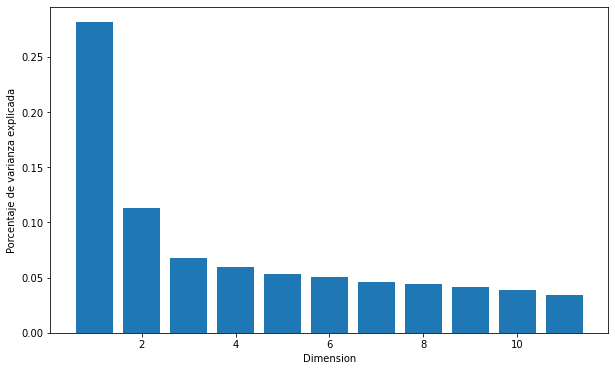

In [ ]:
# Gráfico del porcentaje de varianza explicada para cada componente
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.array([1,2,3,4,5,6,7,8,9,10,11]),pca.explained_variance_ratio_)
ax.set(xlabel = "Dimension",
       ylabel = "Porcentaje de varianza explicada")

plt.show()

En el gráfico se puede evidenciar un rango pequeño de explicación entre componentes principales, siendo el componente principal 1 el que mayormente explica la varianza. 
Los primeros 5 componentes principales explican más del 50% de la varianza en los datos.

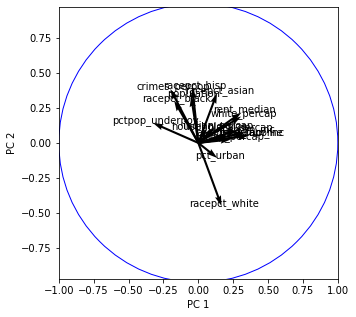

In [ ]:
# Grafica de relación entre componentes 1 y 2
# Get the PCA components (loadings)
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.array(["population", "household_size", "racepct_black", "racepct_white", "racepct_asian", "racepct_hisp", "pct_urban", 
                "med_income", "med_fam_inc", "percap_inc", "white_percap", "black_percap", "indian_percap", "asian_percap", "hisp_percap", 
                "pctpop_underpov", "rent_median", "crimes_perpop"])

for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Done
plt.show()

En este gráfico podemos ver que la variable racepct_white (porcentaje de población caucásica) no tiene mayor incidencia en las demás variables. También vemos que la variable objetivo, crimes_perpop (crímenes violentos por cada 100k habitantes) está más alejada de la dimensión económica que con la dimensión poblacional.

Para ver esta tendencia, eliminamos la mayoría de variables de la dimensión poblacional y dejamos la mayoría de variables de la dimensión económica. Además ajustamos el modelo para que menos componentes principales expliquen el 80% de la varianza en el dataset.

In [ ]:
# Para ajustar el modelo se eliminan las variables que no tienen una relación específica o peso con la varianza
scaler1 = StandardScaler()

dfcrime_scale1 =  scaler1.fit_transform(df_crime[["med_income", "med_fam_inc", "percap_inc", "white_percap", 
                "black_percap", "asian_percap", "indian_percap", "hisp_percap", "pctpop_underpov", 
                "rent_median", "crimes_perpop"]])
dfcrime_scale1

array([[ 0.26262072,  0.27429354, -1.38889388, ..., -0.33097896,
         0.11900804, -0.8673447 ],
       [-0.02408375, -0.21213595,  0.35896404, ..., -0.10340239,
         0.25865223,  2.34492375],
       [-1.36203795, -0.2607789 , -0.17068987, ...,  0.03314355,
        -0.16028034,  1.1588554 ],
       ...,
       [-0.02408375,  0.07972174,  0.04117169, ...,  0.2152048 ,
         0.07245997,  0.17046511],
       [ 0.59710927,  0.66343712, -1.38889388, ..., -0.46752491,
         1.37580575, -0.02721295],
       [-1.31425388,  0.12836469, -0.32958605, ...,  0.39726606,
         0.95687318,  1.40595297]])

Las variables eliminadas fueron:

1. population
2. household_size
3. racepct_white
4. racepct_black
5. racepct_asian
6. racepct_hisp
7. pct_urban

In [ ]:
# Se espera que los componentes principales expliquen un 80% de la varianza.
pca2 = PCA(0.8)

dfcrime_pca2 = pca2.fit(dfcrime_scale1)
dfcrime_pca2 = pca2.transform(dfcrime_scale1)

In [ ]:
# Resultado de la varianza de los componentes
pca2.components_[0]

array([ 0.37639822,  0.38054786,  0.3632579 ,  0.33804677,  0.29771922,
        0.21601915,  0.13358904,  0.25046249, -0.32910397,  0.33026744,
       -0.18442148])

In [ ]:
dfcrime_pca3 = pd.DataFrame(data = dfcrime_pca2)
dfcrime_pca3.head()

,0,1,2,3,4,5
0,0.408185,-0.625036,1.001999,0.271327,0.143352,0.333696
1,-0.328825,1.929023,-0.227501,-1.261145,0.578569,1.011399
2,-1.002111,0.688338,-0.665301,0.338162,0.560620,0.420685
3,0.794920,-1.332846,0.459727,0.262415,0.401967,0.787564
4,1.263832,-0.866747,-1.519727,1.992163,0.071756,-0.690801


In [ ]:
# Porcentaje de la varianza en los componentes
pca2.explained_variance_ratio_

array([0.42332783, 0.09185304, 0.08722479, 0.0755384 , 0.06862464,
       0.06178431])

In [ ]:
# El porcentaje total de varianza explicada es de 80.83%
pca2.explained_variance_ratio_.sum()

0.8083530071893297

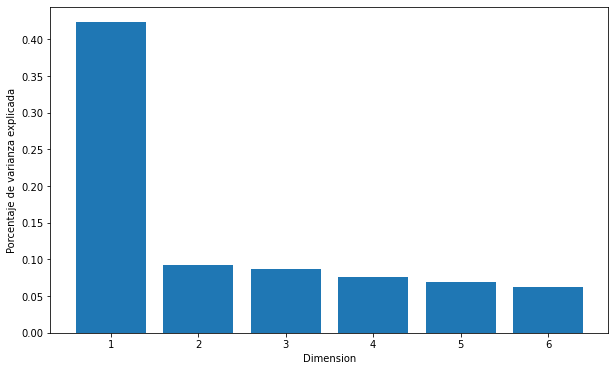

In [ ]:
# Porcentaje de varianza explicada por cada uno de los componentes
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.array([1,2,3,4,5,6]),pca2.explained_variance_ratio_)
ax.set(xlabel = "Dimension",
       ylabel = "Porcentaje de varianza explicada")

plt.show()

Se puede ver que los componentes principales 1 y 2 explican cerca del 50% de la varianza de los datos, obteniendo un modelo más ajustado.

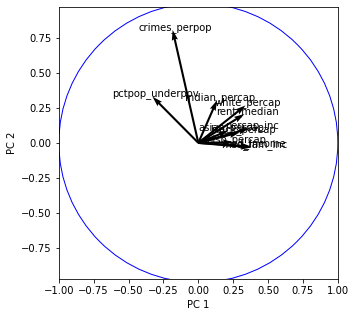

In [ ]:
# Grafica de relación entre componentes 1 y 2
# Get the PCA components (loadings)
PCs = pca2.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.array(["med_income", "med_fam_inc", "percap_inc", "white_percap", 
                "black_percap", "asian_percap", "indian_percap", "hisp_percap", "pctpop_underpov", 
                "rent_median", "crimes_perpop"])

for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Done
plt.show()

Se puede evidenciar que, a excepción de la variable pctpop_underpov (porcentaje de la población por debajo de la línea de la pobreza), las otras variables económicas se encuentras relacionadas y la variable objetivo, la de crímenes violentos se encuentra relativamente alejada de ellas, encontrandose más cercana con la variable de población por debajo de la línea de pobreza.

Vamos ahora analizar a más detalle el comportamiento de la variable objetivo con la dimensión poblacional

In [ ]:
scaler2 = StandardScaler()

dfcrime_scale2 =  scaler.fit_transform(df_crime[["population", "household_size", "racepct_black", 
                 "racepct_white", "racepct_asian", "racepct_hisp", "pct_urban", 
                 "crimes_perpop"]])
dfcrime_scale2

array([[ 1.51329300e+00, -4.35509780e-01, -5.77384818e-01, ...,
         3.71590518e-01, -3.34777587e-01, -8.67344702e-01],
       [-4.93378752e-01, -1.34657560e+00, -9.64117107e-02, ...,
        -2.09183500e-01, -3.34777587e-01,  2.34492375e+00],
       [-4.93378752e-01,  4.68191827e-02,  1.68318879e+00, ...,
        -3.83415706e-01, -3.72530472e-01,  1.15885540e+00],
       ...,
       [ 1.19645009e+00, -2.21141352e-01,  5.28853329e-01, ...,
         8.36209732e-01, -3.34777587e-01,  1.70465106e-01],
       [ 3.51535671e-01,  5.29148146e-01, -3.84995575e-01, ...,
        -5.57647911e-01, -3.34777587e-01, -2.72129524e-02],
       [-2.82150146e-01,  1.97613503e+00, -2.17089166e-04, ...,
         3.85623463e+00, -3.34777587e-01,  1.40595297e+00]])

In [ ]:
# Se espera que los componentes principales expliquen un 80% de la varianza.
pca3 = PCA(0.8)

dfcrime_pca4 = pca3.fit(dfcrime_scale2)
dfcrime_pca4 = pca3.transform(dfcrime_scale2)

In [ ]:
pca3.components_[0]

array([ 0.31304811,  0.00963509,  0.43263687, -0.528874  ,  0.15656126,
        0.32905021, -0.21922709,  0.50416236])

In [ ]:
pca3.explained_variance_ratio_

array([0.26503396, 0.164837  , 0.12944328, 0.12181109, 0.09485297,
       0.09190028])

In [ ]:
# El porcentaje total de varianza explicada es de 86.79%
pca3.explained_variance_ratio_.sum()

0.8678785728347496

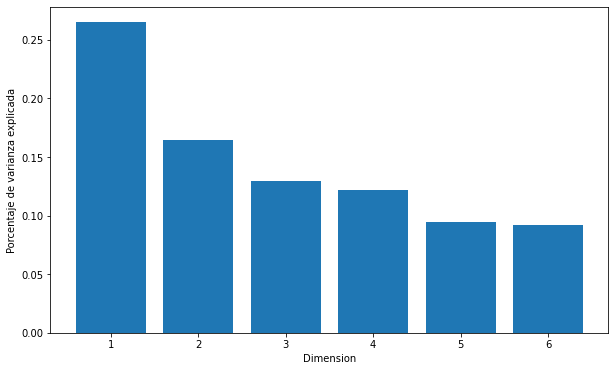

In [ ]:
# Porcentaje de varianza explicada por cada uno de los componentes
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.array([1,2,3,4,5,6]),pca3.explained_variance_ratio_)
ax.set(xlabel = "Dimension",
       ylabel = "Porcentaje de varianza explicada")

plt.show()

Se puede ver que, a comparación de la dimensión económica, la dimensión poblacional está mucho más distribuida y el análisis de componentes principales es menos efectivo, por lo que un número mayor de componentes (4) explican el 50% de la varianza, a diferencia de la dimensión económica (2 componentes).

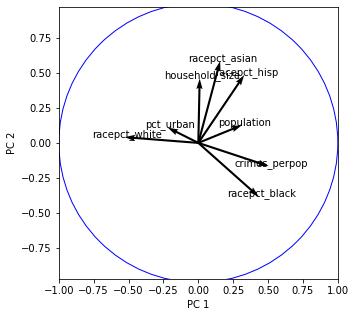

In [ ]:
# Grafica de relación entre componentes 1 y 2
# Get the PCA components (loadings)
PCs = pca3.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.array(["population", "household_size", "racepct_black", 
                 "racepct_white", "racepct_asian", "racepct_hisp", "pct_urban", 
                 "crimes_perpop"])

for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Done
plt.show()

Podemos ver que los dimensión poblacional está mucho más dispersa, por lo que no es clara una relación entre las variables. También podemos ver que la variable objetivo está más cerca de la variable racepct_black y population. 

# Conclusiones

## 1. Para el análisis de correlaciones.
- Tanto en el mapa de calor como en las distintas gráficas de relación entre componentes se identifica que la relación directamente proporcional con las altas tasas de crímenes se da en comunidades con mayor presencia de personas de raza negra. Caso contrario con las comunidades de mayor cantidad de personas caucásicas, donde la relación es inversa.

- Al analizar las correlaciones de la variable concerniente a los crimenes por cada 100 mil habitantes es posible inferir que las variables asociadas a la renta de los hogares (renta per cápita y mediana de la renta de los hogares)  tienen correlación en sentido inverso con los crimenes, lo cual quiere decir que podrían ser inversamente proporcionales.

- Las personas de origen asiático tienen la correlación más cercana a cero con la variable de crimenes lo cual permite inferir que son el grupo poblacional menos involucrado en actos violentos.

## 2. Para el análisis de componentes principales.

- La variables de la dimensión económica explican de manera más efectiva (mediante el método ACP) la varianza de los datos que las variables de la dimensión poblacional.

- La variable objetivo, tasa de crímenes violentos por cada 100mil habitantes, no se encuentra en estrecha relación con la dimensión económica. Las variables de esta dimensión se encuentran estrechamente relacionadas entre sí (exceptuando la variable de población por debajo de la línea de pobreza).

- La relación de la variable objetivo con la dimensión poblacional es variada y poco clara, teniendo más relación con el porcentaje de población afrodescendiente de Estados Unidos. Las variables de la dimensión poblaciones estan menos agrupadas y menos correlacionadas entre sí que la económica. 

- La relación entre la variable objetivo y las variables de población afrodescendiente y población por debajo de la línea de pobreza puede indicar varias cosas: una mayor vulnerabilidad de estas poblaciones históricamente segregadas a sufrir crímenes violentos, y dinámicas de segregación en el registro de los crímenes violentos en estas poblaciones y posible subregistro en las demás poblaciones. 